# <h1><font color=orange>Outline</font></h1>
<ol type="I">
<li>

[GitHub code](#scrollTo=lB-7W2LWSIvn&line=1&uniqifier=1)</li>
<li>Data</li>
<li>BERT model(s)</li>
</ol>

II. GitHub code

III. Data

IV. BERT model(s)

In [13]:
import torch

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(torch.cuda.is_available())

True


In [14]:
PATH = "Thesis/Embeddings"
!ls $PATH

de  en	es  fr	nl  ro


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mapping_methods import *
import keras

settings_nnca = [
    {
        "neurons": [500],
        "activation_function": "elu", #elu
        "max_epochs": 250,
        "dropout": 0.0,
        "loss_function": "Huber",
        "learning_rate": 5e-4
    }
]

settings = settings_nnca[0]

def evaluate_method_transformer(sl, tl, model_name, size, method, dims, evaluation_function):
    sl_vec = np.load(PATH + "/" + f"{sl}/" + f"emb_{model_name}_{sl}.npy",mmap_mode="r")
    tl_vec = np.load(PATH + "/" + f"{tl}/" + f"emb_{model_name}_{tl}.npy",mmap_mode="r")

    sl_vec = torch.as_tensor(sl_vec).to(device)
    tl_vec = torch.as_tensor(tl_vec).to(device)

    print(f"SL data shape: {np.shape(sl_vec)} | TL data shape: {np.shape(tl_vec)}")

    sl_train, sl_test, tl_train, tl_test = train_test_split(sl_vec[:size], tl_vec[:size], test_size=0.25, random_state=42)

    print(f"Model: {model_name} | Training data shape: {np.shape(sl_train)} | Testing data shape: {np.shape(sl_test)}")

    if method == nnca:
        score = method(sl_train, sl_test, tl_train, tl_test, dims, settings, evaluation_function, is_plotting=True)
    else:    
        score = method(sl_train, sl_test, tl_train, tl_test, dims, evaluation_function)

    return score

In [16]:
def evaluate_method(sl, tl, model_name, size, method, dims, evaluation_function):
    score = []
    
    if model_name == "doc2vec":
        score = evaluate_method_doc2vec(sl, tl, model_name, size, method, dims, evaluation_function)
    else: # all transformer models
        score = evaluate_method_transformer(sl, tl, model_name, size, method, dims, evaluation_function)
        
    clear_memory()
        
    return score

In [ ]:
from itertools import permutations

languages = ["en", "ro", "fr", "de", "nl"]

language_pairs = list(permutations(languages,2))

models = ["bert-base-multilingual-uncased", "mt5-base", "xlm-roberta-base", "ernie-m-base_pytorch"]

size = 7000

dims = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 768]

mappings = [lca, lcc, nnca]

evaluation_functions = [mate_retrieval, reciprocal_rank]

mkdir: cannot create directory ‘Thesis/Plots’: File exists
mkdir: cannot create directory ‘Thesis/Results’: File exists
mkdir: cannot create directory ‘Thesis/Plots/reciprocal_rank’: File exists
mkdir: cannot create directory ‘Thesis/Results/reciprocal_rank’: File exists
mkdir: cannot create directory ‘Thesis/Plots/reciprocal_rank/en-ro/’: File exists
SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([187, 768]) | Testing data shape: torch.Size([63, 768])


NNCA: 0it [00:00, ?it/s]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 25)                6275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 250)               6500      
                                                                 
Total params: 12,775
Trainable params: 12,775
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 4ms/step
250 - 

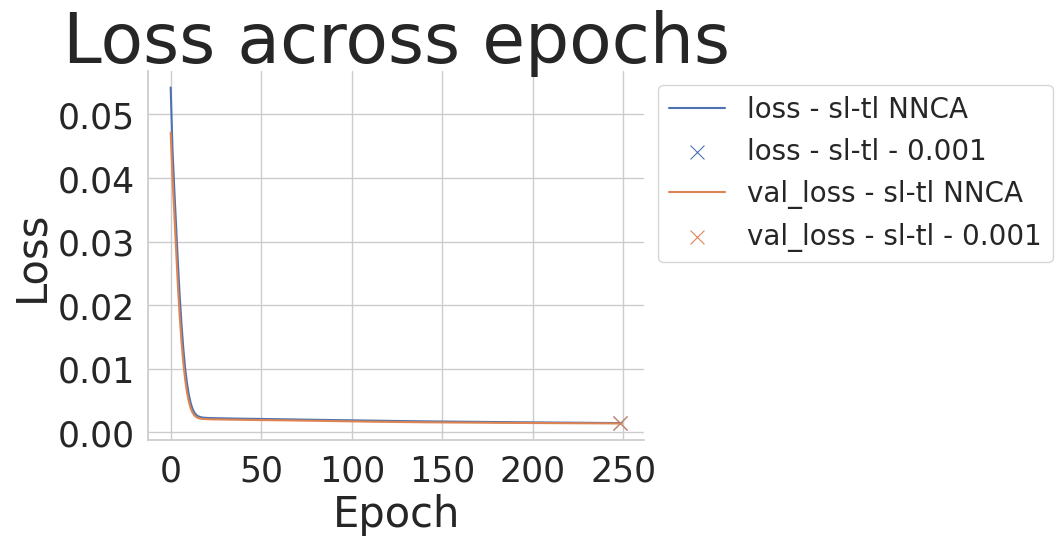

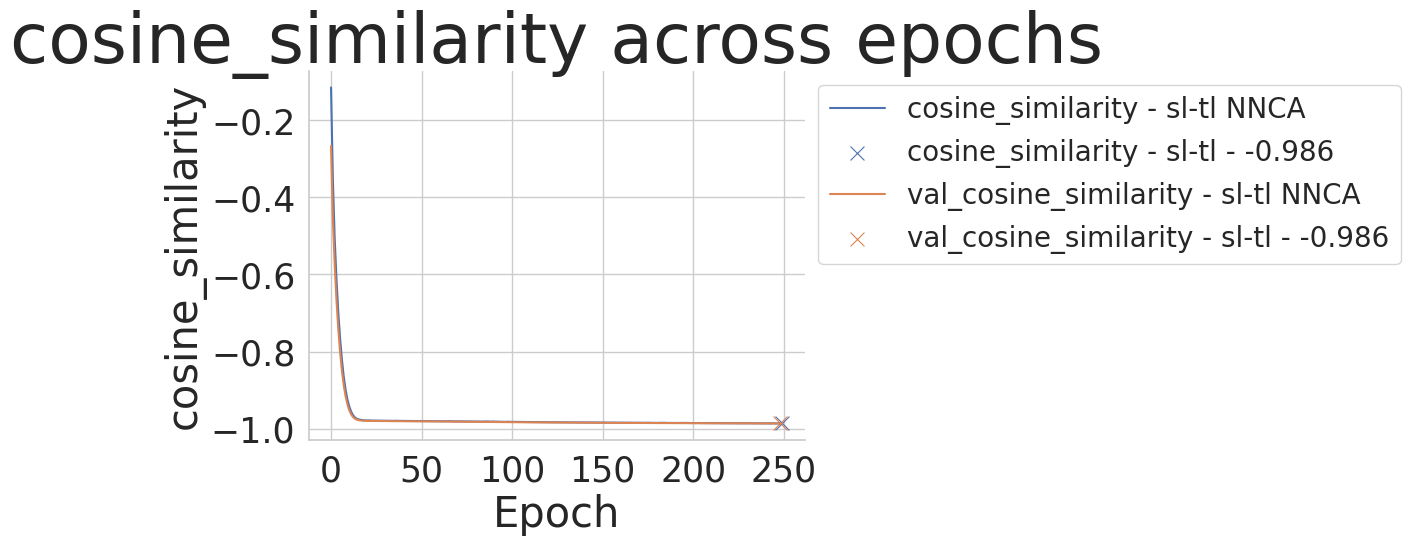

NNCA: 1it [00:45, 45.27s/it]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_2 (Dropout)         (None, 450)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                11275     
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 450)               11700     
                                                                 
Total params: 22,975
Trainable params: 22,975
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 4ms/step
450 

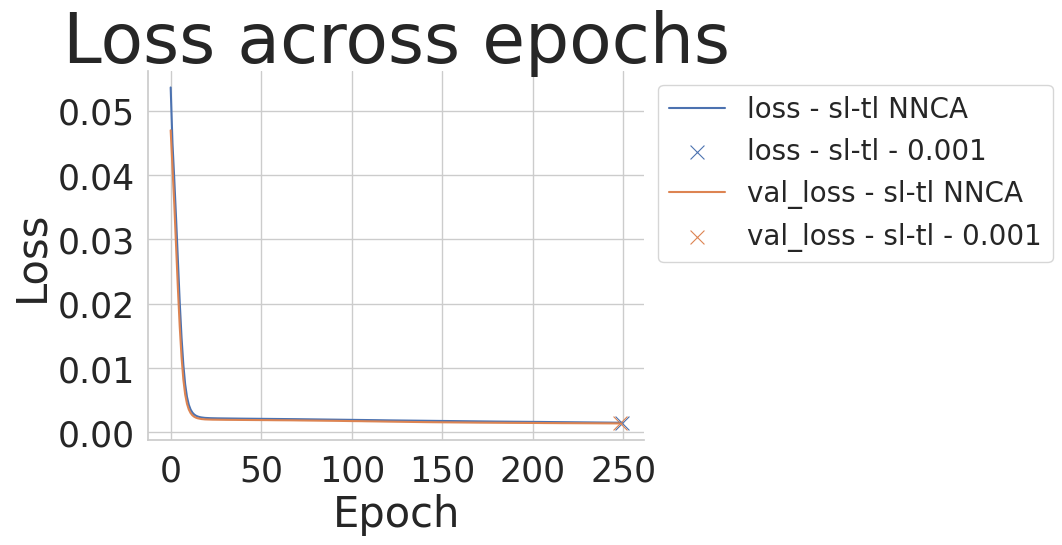

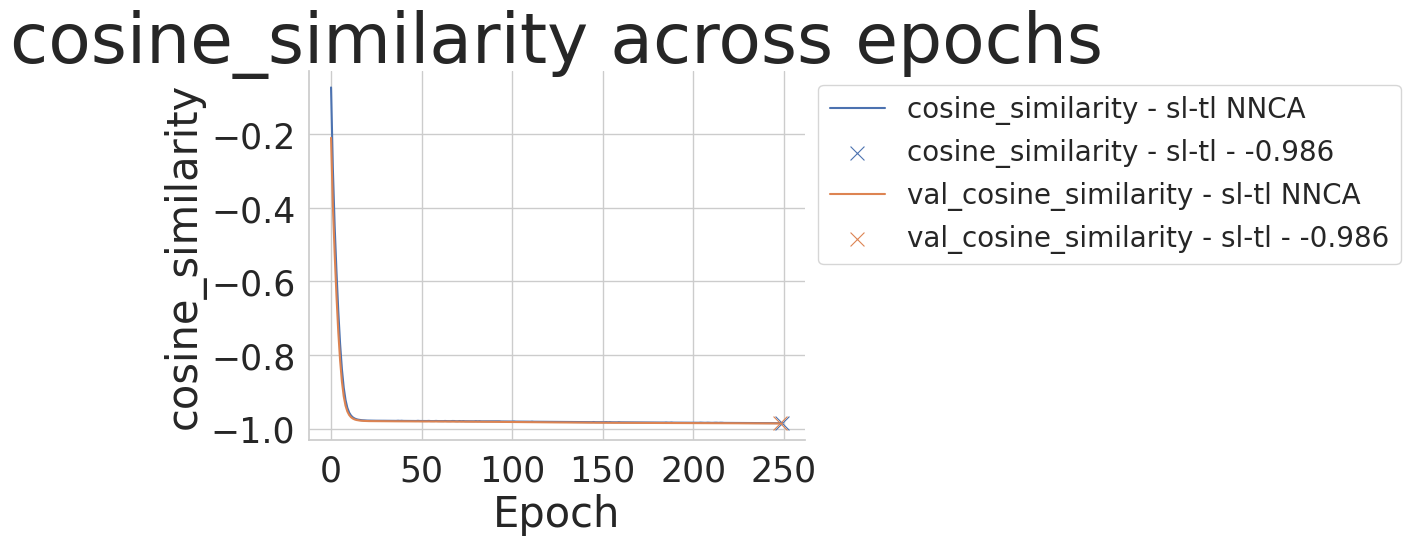

NNCA: 2it [01:19, 38.84s/it]

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 768)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 25)                19225     
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 768)               19968     
                                                                 
Total params: 39,193
Trainable params: 39,193
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 4ms/step
768 

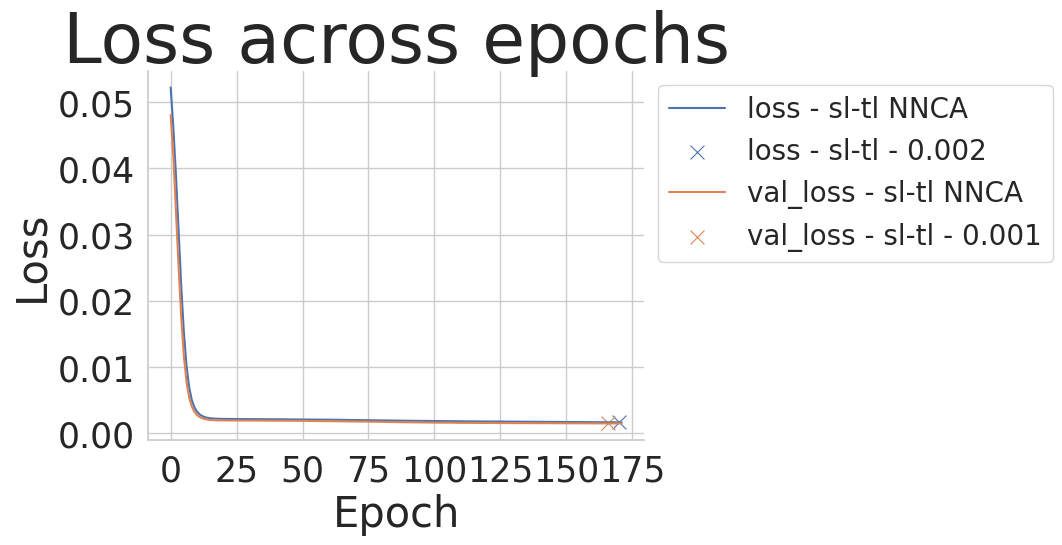

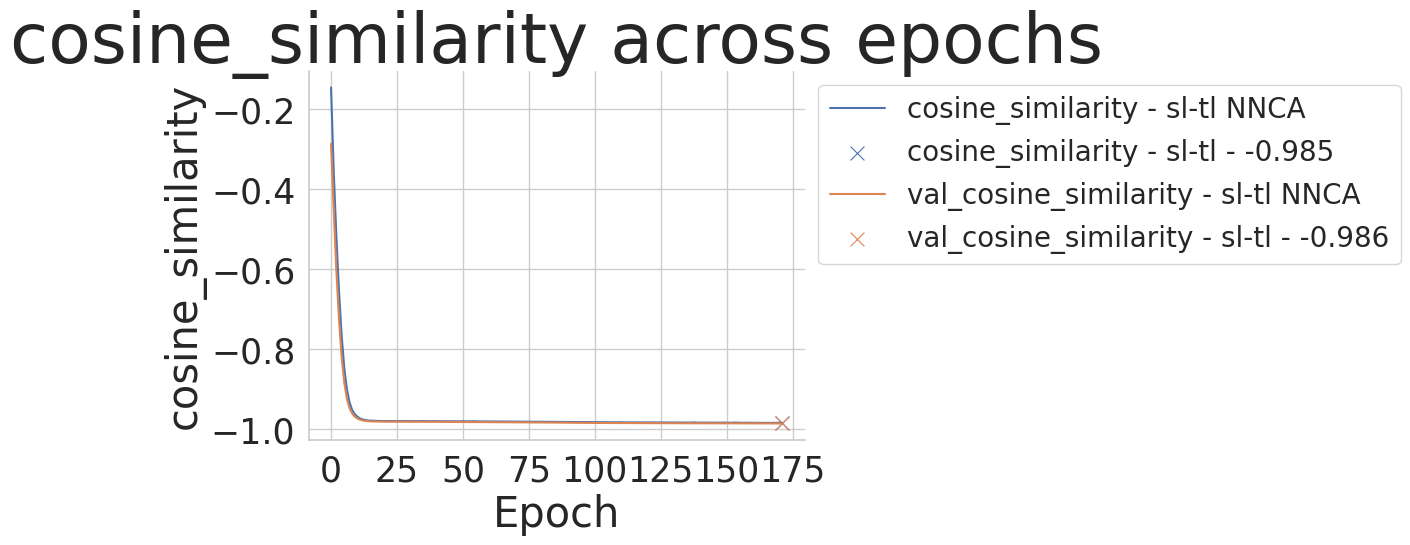

NNCA: 3it [01:56, 38.97s/it]


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |  109749 KB |     966 MB |     966 MB |
|       from large pool |       0 B  |  109749 KB |     885 MB |     885 MB |
|       from small pool |       0 B  |    3439 KB |      81 MB |      81 MB |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |  109749 KB |     966 MB |     966 MB |
|       from large pool |       0 B  |  109749 KB |     885 MB |

<Figure size 640x480 with 0 Axes>

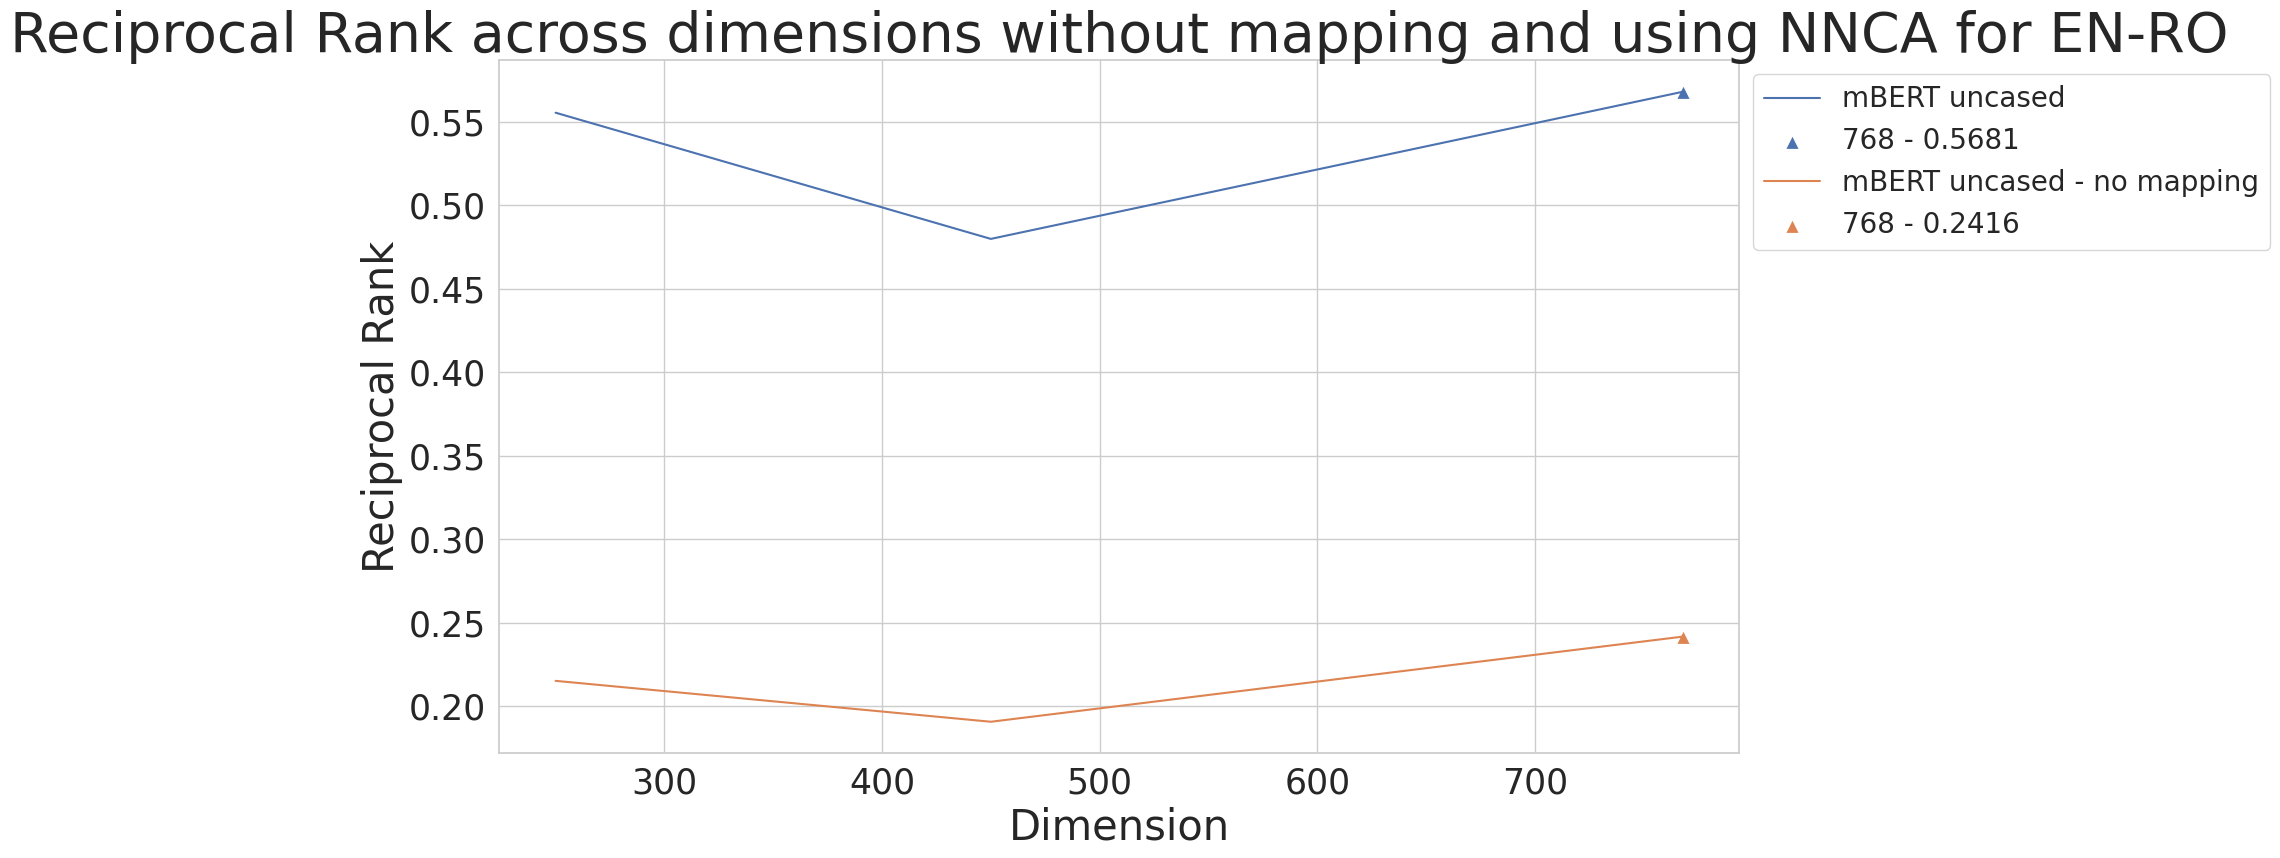

In [45]:
import os
import json
import time

!mkdir Thesis/Plots
!mkdir Thesis/Results

with torch.no_grad():
    for evaluation_function in evaluation_functions:
        start_time = time.time()
        
        !mkdir Thesis/Plots/$evaluation_function.__name__
        !mkdir Thesis/Results/$evaluation_function.__name__
        
        for (sl, tl) in language_pairs:
            language_pair_score = {}
            language_pair = f"{sl}-{tl}"
            
            path = f"Thesis/Plots/{evaluation_function.__name__}/{language_pair}/"
            !mkdir $path
            
            if f"{language_pair}.json" in os.listdir(f"Thesis/Results/{evaluation_function.__name__}"):
                print(f"{language_pair} already present - moving to next language pair")
                continue

            mapping_scores = {}
            for mapping in mappings:
                score_pair = {}
                for model in models:
                    mate_scores = evaluate_method(sl, tl, model, size, mapping, dims, evaluation_function)
                    score_pair[model] = mate_scores
                plot_mate_scores(sl, tl, [value for key, value in score_pair.items()], models, dims, mapping.__name__, path, evaluation_function.__name__)
                mapping_scores[mapping.__name__] = score_pair
                
            print(torch.cuda.memory_summary())            

            print(f"It took {time.time() - start_time}s to process the data for {language_pair}")
            with open(f"./Thesis/Results/{evaluation_function.__name__}/{language_pair}.json", "w") as f:
                json.dump({language_pair: mapping_scores}, f)

In [6]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

In [ ]:
with open(f"./Thesis/data_{evaluation_function.__name__}.json", "r") as f:
    aux = json.load(f)
    print(aux)